_Neural Data Science_

Lecturer: Dr. Jan Lause, Prof. Dr. Philipp Berens

Tutors: Jonas Beck, Fabio Seel, Julius Würzler

Summer term 2025

Student names: <span style='background: yellow'>*FILL IN YOUR NAMES HERE* </span>

LLM Disclaimer: <span style='background: yellow'>*Did you use an LLM to solve this exercise? If yes, which one and where did you use it? [Copilot, Claude, ChatGPT, etc.]* </span>

# Coding Lab 1

## Introduction

In this coding lab you get to implement a pipeline for spike detection and feature extraction, as presented in the lecture:
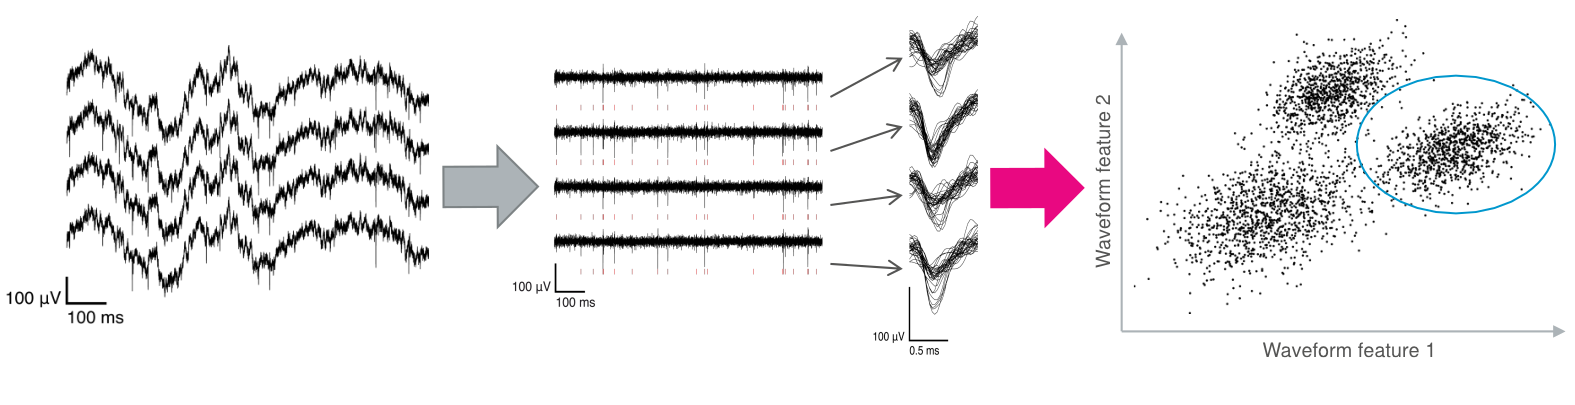

This will later be used for spike sorting (identifying which spike / waveform in the signal was caused by which neuron).

The data used in this notebook was recorded at 30kHz with a tetrode and thus contains the voltage traces of the 4 channels in μV.

_(for more information on the data acquisition, you can have a look at [Ecker et al 2014](https://doi.org/10.1016/j.neuron.2014.02.006), in particular the supplementary material. A similar pipeline is also used in [Ecker et al 2010](https://doi.org/10.1126/science.1179867). Note however that we only use a small portion of the data in this notebook and most of the experiment setup is not relevant here!)_

## Setup
- __Data__: Download the data file ```nds_cl_1.csv``` from ILIAS and save it in a subfolder ```../data/```.
- __Dependencies__: You don't have to use the exact versions of all the dependencies in this notebook, as long as they are new enough. But if you run "Run All" in Jupyter and the boilerplate code breaks, you probably need to upgrade them.


Recommended folder structure:

```
.
├── data/
│   └── nds_cl_1.csv
├── notebooks
│   └── CodingLab1.ipynb
├── matplotlib_style.txt
└── requirements.txt
```

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import PCA
from __future__ import annotations  # for Python 3.8 and below

# black is a code formatter (see https://github.com/psf/black).
# It will automatically format the code you write in the cells imposing consistent Python style.
%load_ext jupyter_black

%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p sklearn

Last updated: 2025-04-22 10:35:29CEST

Python implementation: CPython
Python version       : 3.13.2
IPython version      : 9.0.2

sklearn: 1.6.1

numpy     : 2.2.3
matplotlib: 3.10.1
scipy     : 1.15.2
pandas    : 2.2.3
sklearn   : 1.6.1

Watermark: 2.5.0



## Load data

In [4]:
fs = 30000.0  # sampling rate of the signal in Hz
dt = 1 / fs
cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
x = pd.read_csv("../data/nds_cl_1.csv", header=0, names=cols)

In [5]:
x.describe()

,Ch1,Ch2,Ch3,Ch4
count,1.920000e+07,1.920000e+07,1.920000e+07,1.920000e+07
mean,3.600331e+00,-8.850918e-01,2.864284e-01,2.210982e+00
std,5.824474e+02,6.014818e+02,6.464363e+02,6.126105e+02
min,-3.607000e+03,-3.739000e+03,-3.871000e+03,-3.750000e+03
25%,-3.460000e+02,-3.610000e+02,-3.950000e+02,-3.640000e+02
50%,1.200000e+01,8.000000e+00,-1.000000e+00,1.000000e+01
75%,3.650000e+02,3.720000e+02,4.010000e+02,3.810000e+02
max,2.873000e+03,3.004000e+03,3.099000e+03,3.017000e+03


## Task 1: Filter Signal

In order to detect action potentials, the first step is to filter out low frequency fluctuations (LFP) and high frequency noise. Determine appropriate filter settings and implement the filtering in the function ```filter_signal()```. A typical choice for this task would be a <mark>butterworth filter</mark>.

Plot a segment of the raw signal and the filtered signal for all four channels with matching y-axis. The segment you choose should contain spikes. When you apply the function also test different filter settings.

*Grading: 3 pts*


In [6]:
## Current Best Practice
def filter_signal(
    x: pd.DataFrame, fs: float, low: float, high: float, order: int = 3
) -> pd.DataFrame:
    """Filter raw signal x.

    Parameters
    ----------

    x: pd.DataFrame, (n_samples, n_channels)
        Each column in x is one recording channel.

    fs: float
        Sampling frequency.

    low, high: float, float
        Passband in Hz for the butterworth filter.

    order: int
        The order of the Butterworth filter. Default is 3, but you should try
        changing this and see how it affects the results.


    Returns
    -------

    y: pd.DataFrame, (n_samples, n_channels)
        The filtered x. The filter delay is compensated in the output y.


    Notes
    ----

    1. Try exploring different filters and filter settings. More info:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

    2. The output signal should be phase-shift compensated. More info:
    https://dsp.stackexchange.com/a/19086

    """
    # -----------------------------------------------------------------
    # implement a suitable filter and apply it to the input data (1pt)
    # -----------------------------------------------------------------

    # nyq = 0.5 * fs
    # ow_cut = low / nyq
    # high_cut = high / nyq

    b, a = signal.butter(N=order, Wn=[low, high], fs=fs, btype="bandpass", analog=False)

    # Apply zero-phase filtering
    y = pd.DataFrame(signal.filtfilt(b, a, x, axis=0), columns=x.columns, index=x.index)
    return y

In [7]:
xf = filter_signal(x, fs, 500, 4000)

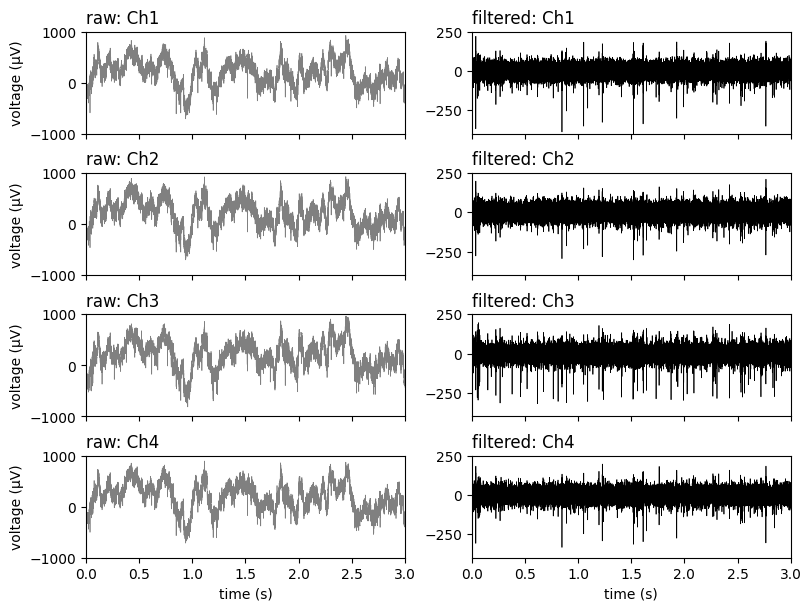

In [8]:
mosaic = [
    ["raw: Ch1", "filtered: Ch1"],
    ["raw: Ch2", "filtered: Ch2"],
    ["raw: Ch3", "filtered: Ch3"],
    ["raw: Ch4", "filtered: Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# ------------------------------------------------------------------------------------
# Plot raw and filtered signals for all 4 channels and answer the questions (1+1 pts)
# ------------------------------------------------------------------------------------


# Plotting segment with spikes
T = 100000
dt = 1 / fs
t = np.arange(0, T) * dt


for i, (raw, filtered) in enumerate(mosaic):
    # plot the ith channel of the raw signal
    ax[raw].plot(t, x[raw.split(": ")[1]][:T], color="gray", lw=0.5)
    # ax[raw].plot(t, x.iloc[:T, i], color="gray", lw=0.5)

    # Plot filtered signal
    ax[filtered].plot(t, xf[raw.split(": ")[1]][:T], color="black", lw=0.5)

    ax[raw].set_xlim((0, 3))
    ax[raw].set_ylim((-1000, 1000))

    ax[filtered].set_xlim((0, 3))
    ax[filtered].set_ylim((-400, 250))

    # Add labels and title
    ax[raw].set_ylabel("voltage (μV)")
    ax[raw].set_title(raw, loc="left")
    ax[filtered].set_title(filtered, loc="left")
    if i != 3:
        ax[raw].set_xticklabels([])
        ax[filtered].set_xticklabels([])
    else:
        ax[raw].set_xlabel("time (s)")
        ax[filtered].set_xlabel("time (s)")

### Questions
1) Explain your implementation: Which filter and parameters did you choose and why?

_YOUR ANSWER HERE_

2) Which parameters of the function can be adjusted, which are determined by the experiment setup? What is the effect of the adjustable parameters?

_YOUR ANSWER HERE_

3) How does the filtered signal look compared to the original? Why is this helpful as preprocessing in our spike detection pipeline?

_YOUR ANSWER HERE_

## Task 2: Detect action potentials

Action potentials are usually detected by finding large-amplitude deflections in the continuous signal. A good choice of threshold for detecting spikes is important. If it is too low, you will detect too many low amplitude events (noise); if it is too high, you run the risk of missing good spikes. Implement an automatic procedure to obtain a reasonable threshold and detect the times when spikes occurred in the function ```detect_spikes()```.

Plot a segment of the filtered signal for all four channels with matching y-axis and indicate the time points where you detected spikes, also **plot the threshold**.

*Grading: 4 pts*

In [9]:
def detect_spikes(
    x: np.ndarray, fs: float, N: int = 5, lockout: float = 1.0
) -> tuple[np.ndarray, np.ndarray, np.float64]:
    """Detect spikes in the signal x and compute a threshold.

    Parameters
    ----------

    x: np.array (n_samples, n_channels)
        The filtered signal from Task 1.

    fs: float
        the sampling rate (in Hz).

    N: int
        An arbitrary number with which you multiply with the standard deviation
        to set a threshold that controls your false positive rate. Default is 5
        but you should try changing it and see how it affects the results.

    lockout: float
        a window of 'refractory period', within which there's only one spike.
        Default is 1ms but you should also try changing it.


    Returns
    -------

    s: np.array, (n_spikes, )
        Spike location / index in the signal x.

    t: np.array, (n_spikes, )
        Spike time in ms. By convention the time of the zeroth sample is 0 ms.

    thrd: float
        Threshold = -N * sigma.


    Tips
    ----

    You can use scipy functions like find_peaks for the detection.
    Note: There are four channels in signal x.

    """
    # --------------------------------------------------------------
    # compute the robust s.d. and calculate the threshold (0.5 pts)
    # --------------------------------------------------------------

    sigma = np.median(np.abs(x - np.mean(x))) / 0.6745
    threshold = N * sigma

    # Lockout in samples
    lockout_samples = int((lockout / 1000) * fs)

    # --------------------------
    # find all spikes (1.5 pts)
    # --------------------------

    # Candidate positive peaks
    pos_peaks, _ = signal.find_peaks(x, distance=lockout_samples)
    pos_peaks = pos_peaks[x[pos_peaks] >= threshold]

    # Candidate negative peaks
    neg_peaks, _ = signal.find_peaks(-x, distance=lockout_samples)
    neg_peaks = neg_peaks[x[neg_peaks] <= -threshold]

    # Combine positive and negative peaks
    peaks = np.sort(np.concatenate((pos_peaks, neg_peaks)))

    spike_times = peaks * (1000 / fs)  # convert to ms

    return peaks, spike_times, threshold

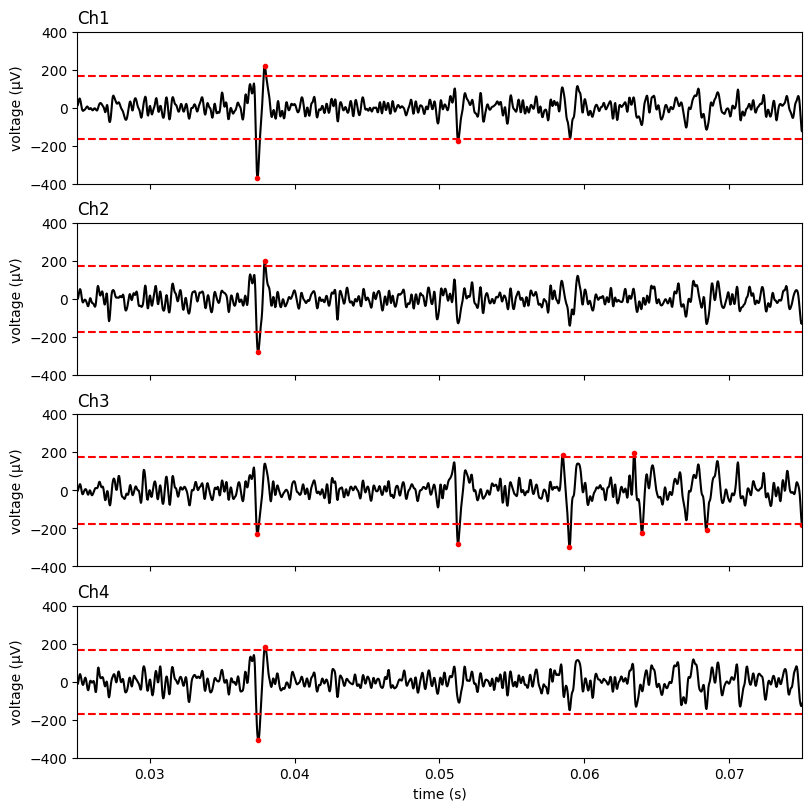

In [10]:
mosaic = [
    ["Ch1"],
    ["Ch2"],
    ["Ch3"],
    ["Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 8), layout="constrained", dpi=100
)

# ------------------------------------------------------------------------------
# plot signal, threshold and detected spikes and answer the questions (1+1 pts)
# ------------------------------------------------------------------------------

for i, col in enumerate(cols):

    data = xf[col].values
    s, t_spikes, thrd = detect_spikes(data, fs, N=5, lockout=1.0)

    time = np.arange(len(data)) / fs
    ax[col].plot(time, data, label="filtered", color="black")
    ax[col].axhline(thrd, color="red", linestyle="--", label="threshold")
    ax[col].axhline(-thrd, color="red", linestyle="--", label="threshold 2")
    ax[col].plot(s / fs, data[s], "ro", markersize=3, label="spikes")

    ax[col].set_ylim((-400, 400))
    ax[col].set_xlim((0.025, 0.075))
    ax[col].set_ylabel("voltage (μV)")

    ax[col].set_title(col, loc="left")

    if col != "Ch4":
        ax[col].set_xticklabels([])
    else:
        ax[col].set_xlabel("time (s)")

### Questions

1) Are the detected time points well aligned with prominent extrema in the signal? Also compare your detections across channels.

_YOUR ANSWER HERE_

2) Take one feature of the spikes and explain how that can help us identifying the source neuron of a spike (only based on visual examination of the plot).

_YOUR ANSWER HERE_

## Task 3: Extract waveforms
For later spike sorting we need the waveforms of all detected spikes. Extract the waveforms segments (1 ms) on all four channels for each spike time (as a result each spike is represented by a 4x30 element matrix). Implement this procedure in the function ```extract_waveforms()```.

Plot (a) the first 100 spikes you detected and (b) the 100 largest spikes you detected.
Are there a lot of very small spikes (likely noise) among your detected spikes? If so your threshold may be too low. Can you see obvious artifacts, not looking like spikes at all?

*Grading: 3 pts*

In [11]:
def extract_waveforms(x: np.ndarray, s: np.ndarray) -> np.ndarray:
    """Extract spike waveforms at times s (given in samples)
    from the filtered signal `xf` using a fixed window around the
    times of the spikes.

    Parameters
    ----------

    x: np.array (n_samples, n_channels)
        The filtered signal.

    s: np.array, (n_spikes, )
        Spike time in samples.


    Return
    ------

    w: np.array, (n_spikes, length_window, n_channels)
        Waveforms. (You don't have to get the exact same
        shape as we noted here. It's just the shape of w
        that can be easily retrieved via broadcasting.)


    Notes
    -----

    More on Numpy Broadcasting
    https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

    """
    # -------------------------------
    # extract spike waveforms (1 pt)
    # -------------------------------

    window_size = int(fs / 1000)
    half_window = window_size // 2

    n_spikes = 0
    waveforms = []

    for spike in s:
        if spike - half_window < 0 or spike + half_window >= x.shape[0]:
            continue
        segment = x[spike - half_window : spike + half_window, :]
        waveforms.append(segment)
        n_spikes += 1

    w = np.stack(waveforms)  # shape: (n_spikes, window_size, n_channels)
    return w

Plot first 100 spike waveforms

[[ 100.90445695  112.90112672   66.4259239   126.41289351]
 [  84.54315114   97.51423706   59.79208195  116.24160942]
 [  74.9343248    85.64239534   60.79873745  108.32804188]
 [  77.69673482   82.21394271   72.67157521  108.8270711 ]
 [  93.85335077   90.31668115   93.3489773   119.27119575]
 [ 116.04516718  107.90207944  113.88393898  133.83834419]
 [ 127.68125927  125.06963282  120.41507169  140.01045524]
 [ 109.11321344  126.35201114  100.2510568   123.91582148]
 [  48.90441591   98.36437435   49.21084612   78.01641704]
 [ -47.79101401   38.04123234  -24.7215298     6.03756665]
 [-160.45713951  -44.55444473 -104.49780023  -78.62101038]
 [-263.03383439 -131.0395832  -171.94258318 -159.81167068]
 [-335.05932689 -203.64958995 -215.19473332 -225.71543834]
 [-367.76969147 -252.26514448 -231.74542351 -271.67809826]
 [-363.90402405 -275.69692506 -226.8489304  -298.45026595]
 [-333.3264862  -277.97779977 -209.19956538 -308.39626921]
 [-287.44059358 -263.96399278 -186.35051819 -302.6429330

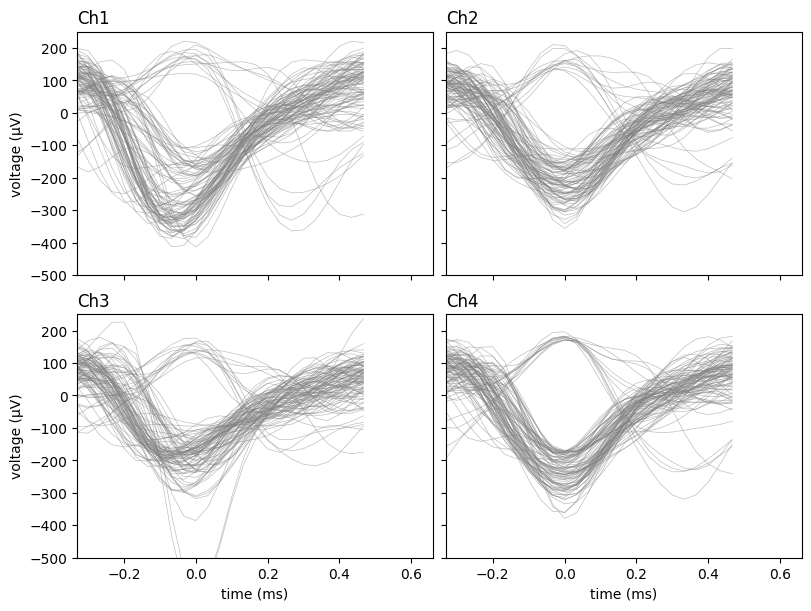

In [12]:
# ---------------------------------------------------------------------
# plot first and largest 100 spikes and answer the questions (1+1 pts)
# ---------------------------------------------------------------------

# first 100 spikes

mosaic = [
    ["Ch1", "Ch2"],
    ["Ch3", "Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
first_100_spikes = extract_waveforms(xf.values, s[:100])

time_axis = (
    (np.arange(first_100_spikes.shape[1]) - first_100_spikes.shape[1] // 2) * 1000 / fs
)  # in ms


print(first_100_spikes[0])

# cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
for i, col in enumerate(cols):

    # ax[col].plot(first_100_spikes[:, :, i].T, color="gray", lw=0.5, alpha=0.5)
    ax[col].plot(
        time_axis, first_100_spikes[:, :, i].T, color="gray", lw=0.5, alpha=0.5
    )

    # labeling etc
    ax[col].set_ylim((-500, 250))
    ax[col].set_xlim((-0.33, 0.66))
    ax[col].set_title(col, loc="left")
    if col == "Ch3" or col == "Ch4":
        ax[col].set_xlabel("time (ms)")
    else:
        ax[col].set_xticklabels([])
    if col == "Ch1" or col == "Ch3":
        ax[col].set_ylabel("voltage (μV)")
    else:
        ax[col].set_yticklabels([])

Plot largest 100 spike waveforms

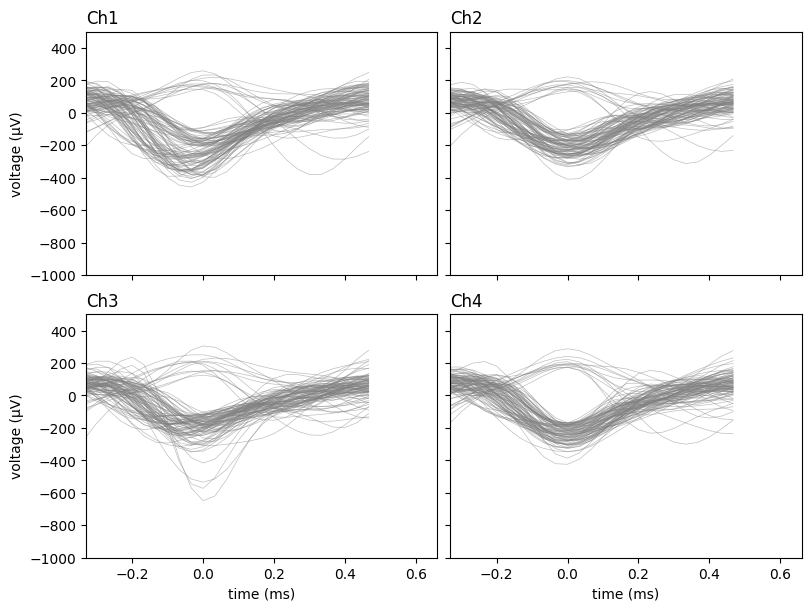

In [13]:
# largest 100 spikes

fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

largest_100_spikes = extract_waveforms(xf.values, s[-100:])

# cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
for i, col in enumerate(cols):

    ax[col].plot(
        time_axis, largest_100_spikes[:, :, i].T, color="gray", lw=0.5, alpha=0.5
    )

for i, col in enumerate(cols):

    # labeling etc
    ax[col].set_ylim((-1000, 500))
    ax[col].set_xlim((-0.33, 0.66))
    ax[col].set_title(col, loc="left")
    if col == "Ch3" or col == "Ch4":
        ax[col].set_xlabel("time (ms)")
    else:
        ax[col].set_xticklabels([])
    if col == "Ch1" or col == "Ch3":
        ax[col].set_ylabel("voltage (μV)")
    else:
        ax[col].set_yticklabels([])

### Questions

1) Describe the shape of the spikes.

_YOUR ANSWER HERE_

1) Do the waveforms tend to be similar? If spikes have a similar waveform, what could that mean - and what does it mean if the waveforms look different?

_YOUR ANSWER HERE_

## Task 4: Extract features using PCA
Compute the first three PCA features on each channel separately in ```extract_features()```. You can use a available PCA implementation or implement it yourself. After that, each spike is represented by a 12 element vector. Compute the fraction of variance captured by these three PCs. Also return the obtained parameters of the PCA

For one channel, plot the mean and the first three principal axes as calculated by the PCA in the feature space. Interprete them in light of the plots in the previous tasks.

For all pairwise combinations of channels, plot the resulting features of the 1st PCs as scatter plots against each other. Do you see clusters visually?

*Grading: 6 pts*

## PCA
### Questions (1 pt)
1) If we input the data from each channel separately to a PCA, what are the feature dimension of the input?

_YOUR ANSWER HERE_

2) Therefore, what do the Principal Axes the PCA computes represent?

_YOUR ANSWER HERE_

3) Does it make sense to apply preprocessing steps, such as normalization? Have a look at the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). What is applied by default?

_YOUR ANSWER HERE_

In [1]:
"""Solution"""


def extract_features(w: np.ndarray) -> np.ndarray:
    """Extract features for spike sorting from the waveforms w.

    Do PCA on the waveforms of each channel separately,
    then concatenate the first three principal components
    of each channels into one numpy array (`b`).


    Parameter
    ---------

    w: np.ndarray, (n_spikes, length_window, n_channels)
        Waveforms from Task 3.


    Return
    ------

    b: np.ndarray, (n_spikes, n_feature)
        the transformed data
    means: np.ndarray, (n_channels, length_window)
        means per channel
    principal_components: np.ndarray, (n_channels, 3, length_window)
        the 'principal axes' obtained by the pca


    Notes
    -----

    You can use PCA from sklearn.

    More on PCA
    https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

    """

    # ----------------------------------------------
    # obtain first 3 principle components (1.5 pts)
    # ----------------------------------------------
    # Loop through each channel
    # and apply PCA to the waveforms
    # Store the first three principal components
    # and the means of each channel
    n_channels = w.shape[2]
    n_spikes = w.shape[0]
    n_features = 3 * n_channels
    b = np.zeros((n_spikes, n_features))
    means = np.zeros((n_channels, w.shape[1]))
    principal_components = np.zeros((n_channels, 3, w.shape[1]))
    explained_variance = np.zeros((n_channels, 3))

    for i in range(n_channels):
        reshaped_waveforms = w[:, :, i].reshape(n_spikes, -1)

        # Apply PCA
        pca = PCA(n_components=3)
        pca.fit(reshaped_waveforms)

        # Store the first three principal components
        b[:, i * 3 : (i + 1) * 3] = pca.transform(reshaped_waveforms)

        # Store the means of each channel
        means[i] = np.mean(w[:, :, i], axis=0)

        # Store the principal components
        principal_components[i] = pca.components_

        # Store the explained variance
        explained_variance[i] = pca.explained_variance_ratio_

    # -----------------------------------------------------------------------------------------------------
    # Print the fraction of variance explained by the three components combined for each channel (0.5 pts)
    # -----------------------------------------------------------------------------------------------------

    print(f"Variance explained by each channel: {explained_variance}")

    return b, means, principal_components

NameError: name 'np' is not defined

In [2]:
"""Solution"""

# ------------------------------------------------------------------------------------------------------------------
# Plot the mean of each channel and the three principal axes obtained by the PCA and answer the questions (1+1 pts)
# ------------------------------------------------------------------------------------------------------------------

mosaic = [
    ["mean", "Principal Axes 1", "Principal Axes 2", "Principal Axes 3"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(10, 3), layout="constrained", dpi=100
)
b, means, principal_components = extract_features(first_100_spikes)

for channel in range(4):
    for i, mo in enumerate(np.ravel(mosaic)):

        if mo == "mean":
            ax[mo].plot(
                time_axis,
                means[channel],
                # color new for each channel
                color=plt.cm.viridis(channel / 4),
                lw=0.8,
            )
        else:
            # Plot the principal axes
            ax[mo].plot(
                time_axis,
                principal_components[channel, i - 1],
                color=plt.cm.viridis(channel / 4),
                lw=0.8,
            )

        ax[mo].set_xlabel("time (ms)")
        ax[mo].set_title(mo)

ax[mosaic[0][0]].set_ylabel("voltage (μV)")
ax[mosaic[0][-1]].legend(
    ["Channel " + str(i) for i in range(4)],
    bbox_to_anchor=(1.04, 1),
    loc="upper left",
)
plt.show()

NameError: name 'plt' is not defined

### Questions

1) Compare the plot to the plots of the other tasks. What do you observe?

_YOUR ANSWER HERE_

2) What does the mean look like? Does this match your expectations?

_YOUR ANSWER HERE_

3) Explain what it means if a spike has a high value in the first dimension. What is the effect of the other dimensions?

_YOUR ANSWER HERE_

Text(0.5, 0.98, 'Pairwise 1st PCs')

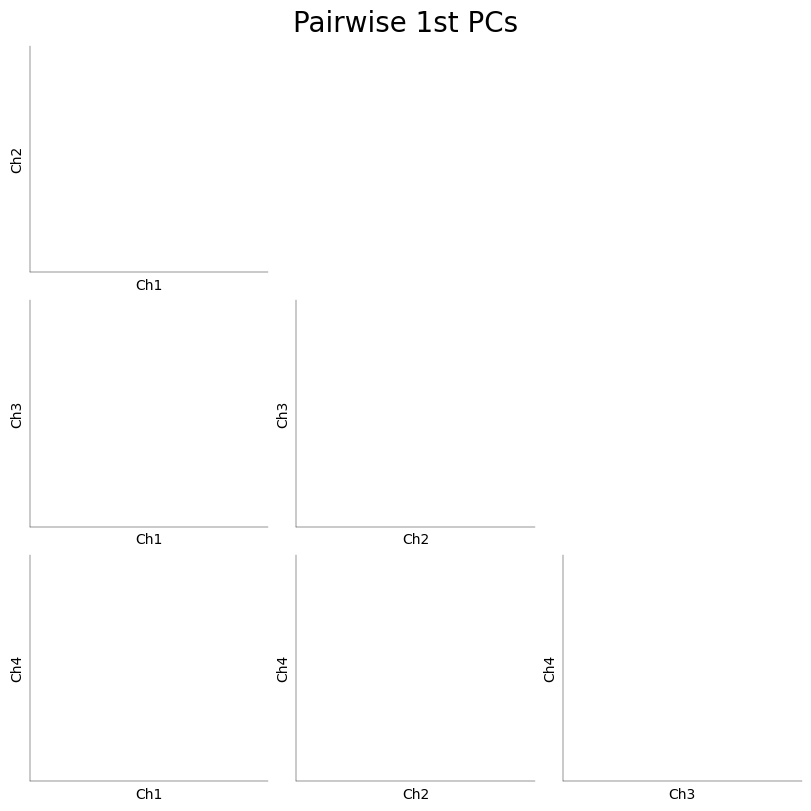

In [ ]:
"""Solution"""

# ----------------------------------------------------------------------------------------------------------
# Create a scatterplot of the projections of the spikes for all pairwise combinations of the 1st PCs (1 pt)
# ----------------------------------------------------------------------------------------------------------

mosaic = [
    ["Ch2 vs Ch1", ".", "."],
    ["Ch3 vs Ch1", "Ch3 vs Ch2", "."],
    ["Ch4 vs Ch1", "Ch4 vs Ch2", "Ch4 vs Ch3"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 8), layout="constrained", dpi=100
)

# index of the 1st PC in `b`
i = {"Ch1": 0, "Ch2": 3, "Ch3": 6, "Ch4": 9}

for mo in np.ravel(mosaic):
    if mo == ".":
        continue
    y, x = mo.split(" vs ")

    ax[mo].set_xlabel(x)
    ax[mo].set_ylabel(y)
    ax[mo].set_xlim((-1500, 1500))
    ax[mo].set_ylim((-1500, 1500))
    ax[mo].set_xticks([])
    ax[mo].set_yticks([])

fig.suptitle("Pairwise 1st PCs", fontsize=20)

In [ ]:
# save data for the next Coding Lab

# np.save("../data/nds_cl_1_features", b)
# np.save("../data/nds_cl_1_spiketimes_s", s)
# np.save("../data/nds_cl_1_spiketimes_t", t)
# np.save("../data/nds_cl_1_waveforms", w)